# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

np.random.seed(1)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imeprial"
query_url = f"{url}appid={api_key}&units={units}&q="

response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [70]:
#creating a variable list
city_name = []
cloudiness = []
countries = []
dates = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

In [71]:
totalcities = len(cities)
i = 1

print("Beginning Weather Data Retrieval")
print("--------------------------------")
for city in cities:
    try:
        print(f"Processing {city} -- number {i} of {totalcities}....")
        i+=1
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        countries.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        time.sleep(1.02)
    except:
        print(f"Not able to process {city}. Moving to next city.")
        
print(f"All done! Processed {len(city_name)} of {totalcities} total cities.")    

Beginning Weather Data Retrieval
--------------------------------
Processing rikitea -- number 1 of 644....
Processing parsabad -- number 2 of 644....
Processing port alfred -- number 3 of 644....
Processing arraial do cabo -- number 4 of 644....
Processing mataura -- number 5 of 644....
Processing hermanus -- number 6 of 644....
Processing cape town -- number 7 of 644....
Processing geraldton -- number 8 of 644....
Processing pisco -- number 9 of 644....
Processing acarau -- number 10 of 644....
Processing puerto ayora -- number 11 of 644....
Processing uruzgan -- number 12 of 644....
Processing dunedin -- number 13 of 644....
Processing yellowknife -- number 14 of 644....
Processing albany -- number 15 of 644....
Processing bryan -- number 16 of 644....
Processing avarua -- number 17 of 644....
Processing atuona -- number 18 of 644....
Processing bluff -- number 19 of 644....
Processing new norfolk -- number 20 of 644....
Processing chapais -- number 21 of 644....
Processing cherskiy

Processing jamestown -- number 169 of 644....
Processing chhindwara -- number 170 of 644....
Processing huilong -- number 171 of 644....
Processing bom jesus da lapa -- number 172 of 644....
Processing sao joao da barra -- number 173 of 644....
Processing ashbourne -- number 174 of 644....
Processing srednekolymsk -- number 175 of 644....
Processing tarudant -- number 176 of 644....
Not able to process tarudant. Moving to next city.
Processing mount gambier -- number 177 of 644....
Processing evensk -- number 178 of 644....
Processing hobyo -- number 179 of 644....
Processing kommunar -- number 180 of 644....
Processing sentyabrskiy -- number 181 of 644....
Not able to process sentyabrskiy. Moving to next city.
Processing manuk mangkaw -- number 182 of 644....
Processing handlova -- number 183 of 644....
Processing meyungs -- number 184 of 644....
Not able to process meyungs. Moving to next city.
Processing atambua -- number 185 of 644....
Processing henties bay -- number 186 of 644...

Processing marcona -- number 338 of 644....
Not able to process marcona. Moving to next city.
Processing xuddur -- number 339 of 644....
Processing kanungu -- number 340 of 644....
Processing santa isabel do rio negro -- number 341 of 644....
Processing inhambane -- number 342 of 644....
Processing hoddesdon -- number 343 of 644....
Processing dingle -- number 344 of 644....
Processing kavaratti -- number 345 of 644....
Processing lewistown -- number 346 of 644....
Processing camacha -- number 347 of 644....
Processing turukhansk -- number 348 of 644....
Processing leshukonskoye -- number 349 of 644....
Processing carutapera -- number 350 of 644....
Processing grand gaube -- number 351 of 644....
Processing miles city -- number 352 of 644....
Processing sinnai -- number 353 of 644....
Processing koslan -- number 354 of 644....
Processing terracina -- number 355 of 644....
Processing tebingtinggi -- number 356 of 644....
Processing penzance -- number 357 of 644....
Processing urumqi -- 

Processing kenai -- number 504 of 644....
Processing biak -- number 505 of 644....
Processing itoman -- number 506 of 644....
Processing luena -- number 507 of 644....
Processing aiken -- number 508 of 644....
Processing elizabeth city -- number 509 of 644....
Processing arlit -- number 510 of 644....
Processing saint-pierre -- number 511 of 644....
Processing ban nahin -- number 512 of 644....
Processing chagda -- number 513 of 644....
Not able to process chagda. Moving to next city.
Processing flin flon -- number 514 of 644....
Processing lima -- number 515 of 644....
Processing ossora -- number 516 of 644....
Processing san pedro -- number 517 of 644....
Processing makakilo city -- number 518 of 644....
Processing talnakh -- number 519 of 644....
Processing mamallapuram -- number 520 of 644....
Processing wanning -- number 521 of 644....
Processing gopalpur -- number 522 of 644....
Processing tessalit -- number 523 of 644....
Processing carleton place -- number 524 of 644....
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_dict = {
                "City":city_name,
                "Country":countries,
                "Cloudiness":cloudiness,
                "Date":dates,
                "Humidity":humidity,
                "Latitude":lat,
                "Longitude":long,
                "Max Temp":max_temp,
                "Wind Speed":wind_speed   
            }
city_data_df=pd.DataFrame(city_dict)
city_data_csv=city_data_df.to_csv('city_data.csv', header=True)

In [72]:
city_data_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,PF,90,1604029272,74,-23.12,-134.97,297.31,2.35
1,Pārsābād,IR,0,1604029273,93,39.65,47.92,283.15,3.10
2,Port Alfred,ZA,98,1604029274,64,-33.59,26.89,289.11,5.08
3,Arraial do Cabo,BR,97,1604029275,93,-22.97,-42.03,297.03,2.36
4,Mataura,NZ,100,1604029276,88,-46.19,168.86,289.26,1.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#city_data_df['Humidity'].describe()
#for temp in city_data_df['Humidity']:
#   if temp >100:
#      print(temp)
        

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

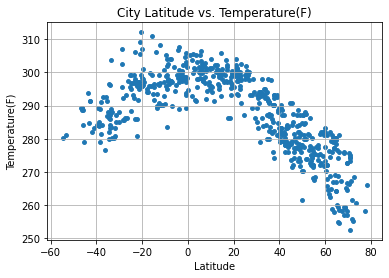

In [73]:
plt.scatter(city_data_df["Latitude"],city_data_df["Max Temp"],s=15 , marker="o")

plt.title(f"City Latitude vs. Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid()
#save the plot
plt.savefig("Lat_v_Temp.png")

plt.show()

## Latitude vs. Humidity Plot

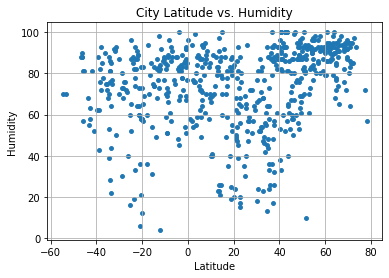

In [74]:
plt.scatter(city_data_df["Latitude"],city_data_df["Humidity"],s=15 , marker="o")

plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid()
#save the plot
plt.savefig("Lat_v_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

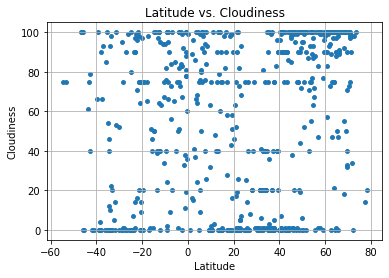

In [75]:
plt.scatter(city_data_df["Latitude"],city_data_df["Cloudiness"],s=15 , marker="o")

#making a title
plt.title("Latitude vs. Cloudiness")

# making a label for x and y axis
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#making a grid
plt.grid()

#saving the plot in to png file
plt.savefig("Lat_v_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

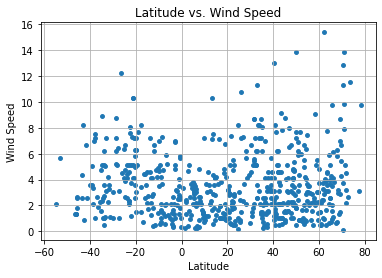

In [76]:
plt.scatter(city_data_df["Latitude"],city_data_df["Wind Speed"], s=15, marker="o")
# making a title
plt.title("Latitude vs. Wind Speed")

#making a label for x and y axis
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# make a grid
plt.grid()
#saving the plot as png file
plt.savefig('Lat_vs_Windspeed.png')
plt.show()


## Linear Regression

In [90]:
northern =city_data_df.loc[city_data_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8878734406077713


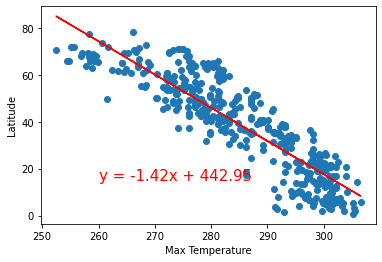

In [95]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_value=(northern["Max Temp"])
y_value=northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
print(f"The r-squared is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(260,15),fontsize=15,color="red")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig(f"North_Hemi_Temp_vs_Latitude.png")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression